In [ ]:
import numpy as np 
import pandas as pd 
from glob import glob
import os
import PIL
import tensorflow as tf
import pathlib 
from tensorflow import keras
import tensorflow_hub as hub
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


5172


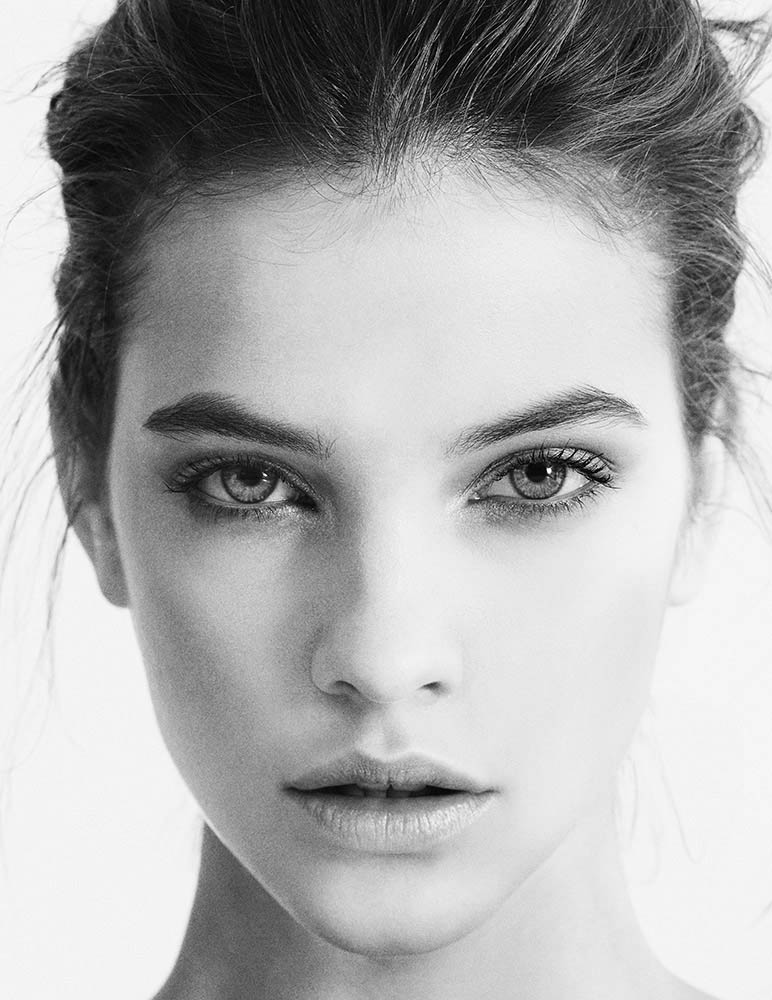

In [ ]:
import pathlib
data_dir = pathlib.Path("/content/drive/MyDrive/Colab Notebooks/DATA/Male and Female face dataset")
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)
female = list(data_dir.glob('Female Faces/*'))
PIL.Image.open(str(female[15]))


Found 5418 files belonging to 2 classes.
Using 4064 files for training.
Found 5418 files belonging to 2 classes.
Using 1354 files for validation.
['Female Faces', 'Male Faces']
0.0 0.9551292


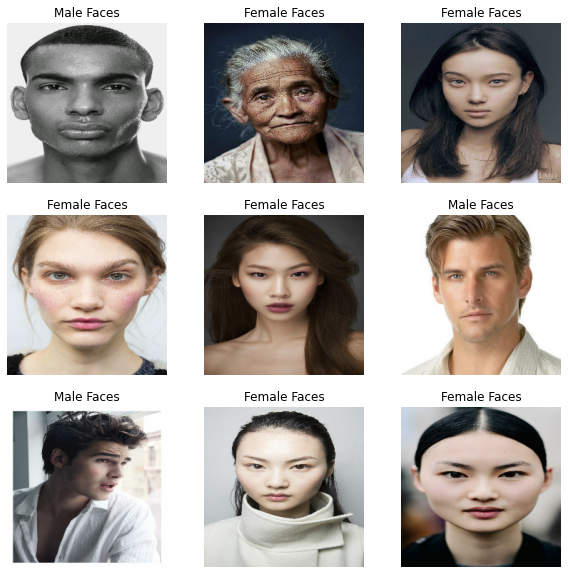

In [ ]:
batch_size = 32
img_height = 224
img_width = 224

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.25,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
  
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.25,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

num_classes = 2

Epoch 1/15
127/127 [==============================] - 113s 800ms/step - loss: 0.6135 - accuracy: 0.6594 - val_loss: 0.5335 - val_accuracy: 0.7127
Epoch 2/15
127/127 [==============================] - 5s 39ms/step - loss: 0.3950 - accuracy: 0.8233 - val_loss: 0.3022 - val_accuracy: 0.8744
Epoch 3/15
127/127 [==============================] - 5s 37ms/step - loss: 0.2297 - accuracy: 0.9104 - val_loss: 0.1858 - val_accuracy: 0.9254
Epoch 4/15
127/127 [==============================] - 5s 37ms/step - loss: 0.1387 - accuracy: 0.9469 - val_loss: 0.1341 - val_accuracy: 0.9616
Epoch 5/15
127/127 [==============================] - 5s 37ms/step - loss: 0.0757 - accuracy: 0.9739 - val_loss: 0.0962 - val_accuracy: 0.9727
Epoch 6/15
127/127 [==============================] - 5s 37ms/step - loss: 0.0419 - accuracy: 0.9860 - val_loss: 0.1034 - val_accuracy: 0.9764
Epoch 7/15
127/127 [==============================] - 5s 37ms/step - loss: 0.0291 - accuracy: 0.9904 - val_loss: 0.1422 - val_accuracy: 0.9

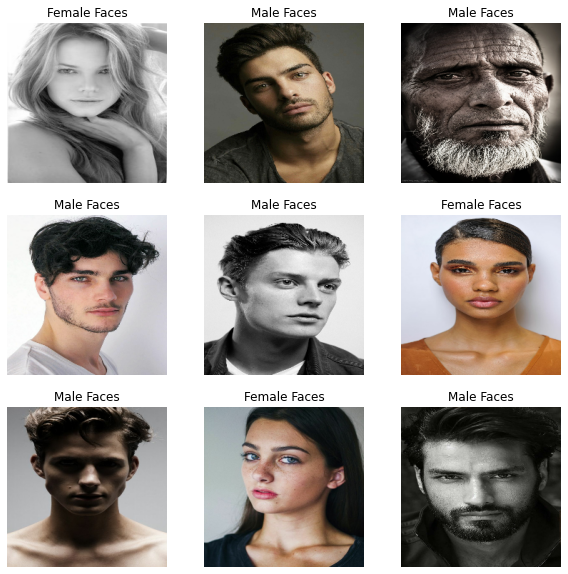

In [ ]:
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs = 15
history = model.fit(train_ds,validation_data=val_ds,epochs=epochs)

plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(1):
  print(model.predict(images))  
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
acc = history.history['accuracy']
print(" The accuracy of the varied model is {:.2f} % " .format(acc[-1]*100))

 The accuracy of the varied model is 99.95 % 


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        1

In [ ]:
model.save('my_model.h5')
import shutil
shutil.copy('my_model.h5','/content/drive/MyDrive/Colab Notebooks')

'/content/drive/MyDrive/Colab Notebooks/my_model.h5'

# The oreginal model given by instructor.


Epoch 1/15
127/127 [==============================] - 5s 37ms/step - loss: 0.7347 - accuracy: 0.5965 - val_loss: 0.4861 - val_accuracy: 0.7578
Epoch 2/15
127/127 [==============================] - 4s 35ms/step - loss: 0.4736 - accuracy: 0.7746 - val_loss: 0.4150 - val_accuracy: 0.8043
Epoch 3/15
127/127 [==============================] - 4s 35ms/step - loss: 0.3387 - accuracy: 0.8533 - val_loss: 0.2759 - val_accuracy: 0.8877
Epoch 4/15
127/127 [==============================] - 5s 36ms/step - loss: 0.1904 - accuracy: 0.9306 - val_loss: 0.1970 - val_accuracy: 0.9313
Epoch 5/15
127/127 [==============================] - 5s 36ms/step - loss: 0.0965 - accuracy: 0.9668 - val_loss: 0.1458 - val_accuracy: 0.9527
Epoch 6/15
127/127 [==============================] - 4s 35ms/step - loss: 0.0528 - accuracy: 0.9855 - val_loss: 0.0906 - val_accuracy: 0.9727
Epoch 7/15
127/127 [==============================] - 5s 37ms/step - loss: 0.0345 - accuracy: 0.9870 - val_loss: 0.0725 - val_accuracy: 0.9823

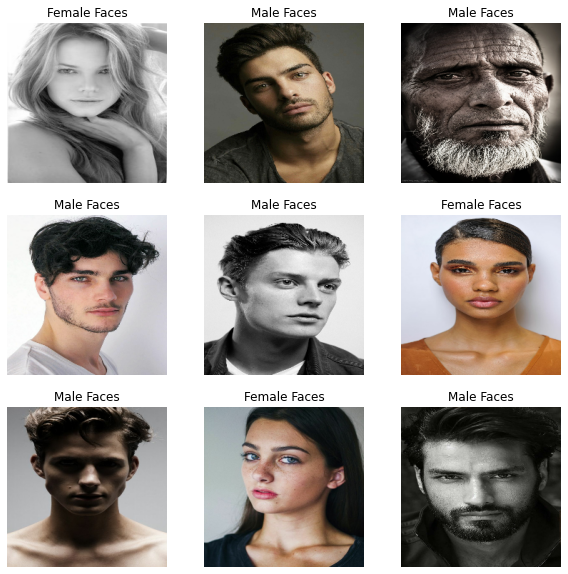

In [ ]:
OG_model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

OG_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs = 15
OG_history = OG_model.fit(train_ds,validation_data=val_ds,epochs=epochs)

plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(1):
  print(OG_model.predict(images))  
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")



In [ ]:
OG_acc = OG_history.history['accuracy']
print(" This is the accuracy of the original or given model {:.2f} % " .format(OG_acc[-1]*100))

 This is the accuracy of the original or given model 99.85 % 


Text(0.5, 1.0, 'The difference between Varied and Original model Accuracy')

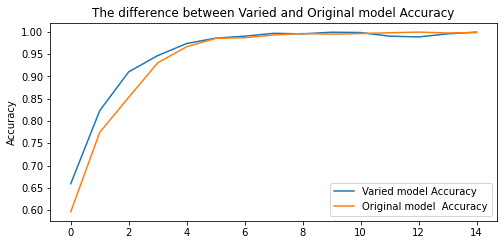

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Varied model Accuracy')
plt.plot(OG_acc, label='Original model  Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title('The difference between Varied and Original model Accuracy')

In [ ]:
OG_model.save('OG_model.h5')
shutil.copy('OG_model.h5','/content/drive/MyDrive/Colab Notebooks')

'/content/drive/MyDrive/Colab Notebooks/OG_model.h5'

In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/my_model.h5')
# here we can reuse a model

In [ ]:
mobileNet_classlifer = tf.keras.Sequential(
          hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4", input_shape = (224,224,3), trainable = False)
          )
MNclasslicer = tf.keras.Sequential([
              mobileNet_classlifer,
              tf.keras.layers.Dense(num_classes)
])
MNclasslicer.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_18 (Sequential)  (None, 1280)              2257984   
                                                                 
 dense_30 (Dense)            (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
MNclasslicer.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
historyOfMN = MNclasslicer.fit(train_ds,validation_data=val_ds,epochs=15)

Epoch 1/15
127/127 [==============================] - 10s 56ms/step - loss: 0.5971 - accuracy: 0.6806 - val_loss: 0.4620 - val_accuracy: 0.7747
Epoch 2/15
127/127 [==============================] - 7s 51ms/step - loss: 0.4382 - accuracy: 0.8105 - val_loss: 0.4018 - val_accuracy: 0.8323
Epoch 3/15
127/127 [==============================] - 7s 51ms/step - loss: 0.3943 - accuracy: 0.8246 - val_loss: 0.3811 - val_accuracy: 0.8301
Epoch 4/15
127/127 [==============================] - 7s 53ms/step - loss: 0.3626 - accuracy: 0.8457 - val_loss: 0.3564 - val_accuracy: 0.8456
Epoch 5/15
127/127 [==============================] - 7s 51ms/step - loss: 0.3337 - accuracy: 0.8686 - val_loss: 0.3525 - val_accuracy: 0.8405
Epoch 6/15
127/127 [==============================] - 7s 52ms/step - loss: 0.3176 - accuracy: 0.8693 - val_loss: 0.3419 - val_accuracy: 0.8530
Epoch 7/15
127/127 [==============================] - 7s 51ms/step - loss: 0.2979 - accuracy: 0.8844 - val_loss: 0.3324 - val_accuracy: 0.848

In [ ]:
MB_acc = historyOfMN.history['accuracy']
print(" This is the accuracy of the original or given model {:.2f} % " .format(MB_acc[-1]*100))

 This is the accuracy of the original or given model 91.81 % 


In [ ]:
inception_classlifer = tf.keras.Sequential(
          hub.KerasLayer("https://tfhub.dev/google/imagenet/inception_v3/feature_vector/5", input_shape = (224,224,3), trainable = False)
          )
INCclasslicer = tf.keras.Sequential([
              inception_classlifer,
              tf.keras.layers.Dense(num_classes)
])
INCclasslicer.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_14 (Sequential)  (None, 2048)              21802784  
                                                                 
 dense_28 (Dense)            (None, 2)                 4098      
                                                                 
Total params: 21,806,882
Trainable params: 4,098
Non-trainable params: 21,802,784
_________________________________________________________________


In [ ]:
INCclasslicer.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
historyOfIN = INCclasslicer.fit(train_ds,validation_data=val_ds,epochs=15)

Epoch 1/15
127/127 [==============================] - 19s 106ms/step - loss: 6.4727 - accuracy: 0.6410 - val_loss: 3.6121 - val_accuracy: 0.7024
Epoch 2/15
127/127 [==============================] - 12s 98ms/step - loss: 3.2790 - accuracy: 0.7050 - val_loss: 4.9024 - val_accuracy: 0.6285
Epoch 3/15
127/127 [==============================] - 12s 94ms/step - loss: 3.4525 - accuracy: 0.7419 - val_loss: 3.9137 - val_accuracy: 0.6669
Epoch 4/15
127/127 [==============================] - 12s 95ms/step - loss: 2.3846 - accuracy: 0.7468 - val_loss: 1.9817 - val_accuracy: 0.7873
Epoch 5/15
127/127 [==============================] - 12s 95ms/step - loss: 1.7936 - accuracy: 0.7790 - val_loss: 1.5933 - val_accuracy: 0.8117
Epoch 6/15
127/127 [==============================] - 12s 96ms/step - loss: 2.2446 - accuracy: 0.7643 - val_loss: 4.1579 - val_accuracy: 0.6765
Epoch 7/15
127/127 [==============================] - 12s 96ms/step - loss: 2.5280 - accuracy: 0.7694 - val_loss: 1.5536 - val_accuracy

In [ ]:
inception_acc = historyOfIN.history['accuracy']
print(" This is the accuracy of the original or given model {:.2f} % " .format(inception_acc[-1]*100))

 This is the accuracy of the original or given model 79.26 % 


In [ ]:
resnet_v2_50_classlifer = tf.keras.Sequential(
          hub.KerasLayer("https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4", input_shape = (224,224,3), trainable = False)
          )
RNclasslicer = tf.keras.Sequential([
              resnet_v2_50_classlifer,
              tf.keras.layers.Dense(num_classes)
])
RNclasslicer.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_16 (Sequential)  (None, 2048)              23564800  
                                                                 
 dense_29 (Dense)            (None, 2)                 4098      
                                                                 
Total params: 23,568,898
Trainable params: 4,098
Non-trainable params: 23,564,800
_________________________________________________________________


In [ ]:
RNclasslicer.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
historyOfRN = RNclasslicer.fit(train_ds,validation_data=val_ds,epochs=15)

Epoch 1/15
127/127 [==============================] - 20s 121ms/step - loss: 11.6910 - accuracy: 0.6154 - val_loss: 13.8242 - val_accuracy: 0.5694
Epoch 2/15
127/127 [==============================] - 14s 113ms/step - loss: 5.9379 - accuracy: 0.6818 - val_loss: 4.8099 - val_accuracy: 0.7016
Epoch 3/15
127/127 [==============================] - 14s 113ms/step - loss: 5.0198 - accuracy: 0.7131 - val_loss: 11.1787 - val_accuracy: 0.5990
Epoch 4/15
127/127 [==============================] - 14s 114ms/step - loss: 5.4792 - accuracy: 0.7055 - val_loss: 3.8141 - val_accuracy: 0.7120
Epoch 5/15
127/127 [==============================] - 14s 112ms/step - loss: 3.0270 - accuracy: 0.7670 - val_loss: 3.2803 - val_accuracy: 0.7282
Epoch 6/15
127/127 [==============================] - 14s 111ms/step - loss: 3.8031 - accuracy: 0.7475 - val_loss: 4.0683 - val_accuracy: 0.7046
Epoch 7/15
127/127 [==============================] - 14s 113ms/step - loss: 3.2836 - accuracy: 0.7726 - val_loss: 3.8375 - val

In [ ]:
RN_acc = historyOfRN.history['accuracy']
print(" This is the accuracy of the original or given model {:.2f} % " .format(RN_acc[-1]*100))

 This is the accuracy of the original or given model 82.31 % 


In [ ]:
VGG16Test = tf.keras.applications.VGG16(input_shape = (224,224,3),
                                               include_top = False,
                                               weights = 'imagenet',
                                               classes = num_classes)
new_model = Sequential()
new_model.add(VGG16Test)
new_model.add(layers.Dropout(0.2))
new_model.add(layers.Flatten())
new_model.add(tf.keras.layers.Dense(128, activation = 'relu'))
new_model.add(tf.keras.layers.Dense(num_classes))
new_model.trainable = False
new_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 dropout_4 (Dropout)         (None, 7, 7, 512)         0         
                                                                 
 flatten_6 (Flatten)         (None, 25088)             0         
                                                                 
 dense_24 (Dense)            (None, 128)               3211392   
                                                                 
 dense_25 (Dense)            (None, 2)                 258       
                                                                 
Total params: 17,926,338
Trainable params: 0
Non-trainable params: 17,926,338
_________________________________________________________________


In [ ]:
new_model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
historyOfV = new_model.fit(train_ds,validation_data=val_ds,epochs=15)

Epoch 1/15
127/127 [==============================] - 28s 215ms/step - loss: 13.6638 - accuracy: 0.5094 - val_loss: 12.4114 - val_accuracy: 0.5007
Epoch 2/15
127/127 [==============================] - 27s 214ms/step - loss: 13.9559 - accuracy: 0.5094 - val_loss: 12.4114 - val_accuracy: 0.5007
Epoch 3/15
127/127 [==============================] - 26s 208ms/step - loss: 13.8343 - accuracy: 0.5062 - val_loss: 12.4114 - val_accuracy: 0.5007
Epoch 4/15
127/127 [==============================] - 27s 216ms/step - loss: 13.6308 - accuracy: 0.5098 - val_loss: 12.4114 - val_accuracy: 0.5007
Epoch 5/15
127/127 [==============================] - 27s 210ms/step - loss: 13.7513 - accuracy: 0.5084 - val_loss: 12.4114 - val_accuracy: 0.5007
Epoch 6/15
127/127 [==============================] - 26s 208ms/step - loss: 13.8555 - accuracy: 0.5089 - val_loss: 12.4114 - val_accuracy: 0.5007
Epoch 7/15
127/127 [==============================] - 27s 211ms/step - loss: 13.9585 - accuracy: 0.5039 - val_loss: 12

In [ ]:
VGG16_acc = historyOfV.history['accuracy']
print(" This is the accuracy of the original or given model {:.2f} % " .format(VGG16_acc[-1]*100))

 This is the accuracy of the original or given model 50.34 % 


In [ ]:
XceptionTest = tf.keras.applications.Xception(input_shape = (224,224,3),
                                               include_top = False,
                                               weights = 'imagenet',
                                               classes = num_classes)
new_model_X = Sequential()
new_model_X.add(XceptionTest)
new_model_X.add(layers.Dropout(0.2))
new_model_X.add(layers.Flatten())
new_model_X.add(tf.keras.layers.Dense(128, activation = 'relu'))
new_model_X.add(tf.keras.layers.Dense(num_classes))
new_model_X.trainable = False
new_model_X.summary()

83697664/83683744 [==============================] - 2s 0us/step
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 dropout_5 (Dropout)         (None, 7, 7, 2048)        0         
                                                                 
 flatten_7 (Flatten)         (None, 100352)            0         
                                                                 
 dense_26 (Dense)            (None, 128)               12845184  
                                                                 
 dense_27 (Dense)            (None, 2)                 258       
                                                                 
Total params: 33,706,922
Trainable params: 0
Non-trainable params: 33,706,922
__________________________________________

In [ ]:
new_model_X.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
historyOfX = new_model_X.fit(train_ds,validation_data=val_ds,epochs=15)

Epoch 1/15
127/127 [==============================] - 68s 170ms/step - loss: 28.7273 - accuracy: 0.5000 - val_loss: 26.4166 - val_accuracy: 0.5052
Epoch 2/15
127/127 [==============================] - 20s 161ms/step - loss: 28.7772 - accuracy: 0.4993 - val_loss: 26.4166 - val_accuracy: 0.5052
Epoch 3/15
127/127 [==============================] - 21s 162ms/step - loss: 28.9809 - accuracy: 0.4995 - val_loss: 26.4166 - val_accuracy: 0.5052
Epoch 4/15
127/127 [==============================] - 21s 165ms/step - loss: 29.1605 - accuracy: 0.4995 - val_loss: 26.4166 - val_accuracy: 0.5052
Epoch 5/15
127/127 [==============================] - 21s 164ms/step - loss: 28.7169 - accuracy: 0.4983 - val_loss: 26.4166 - val_accuracy: 0.5052
Epoch 6/15
127/127 [==============================] - 21s 166ms/step - loss: 29.0036 - accuracy: 0.5012 - val_loss: 26.4166 - val_accuracy: 0.5052
Epoch 7/15
127/127 [==============================] - 21s 167ms/step - loss: 28.6701 - accuracy: 0.4993 - val_loss: 26

In [ ]:
X_acc = historyOfX.history['accuracy']
print(" This is the accuracy of the original or given model {:.2f} % " .format(X_acc[-1]*100))

 This is the accuracy of the original or given model 50.00 % 


Text(0.5, 1.0, 'Comparesion between the models accuracy')

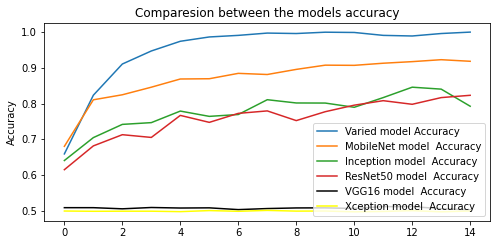

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Varied model Accuracy')
plt.plot(MB_acc, label='MobileNet model  Accuracy')
plt.plot(inception_acc, label='Inception model  Accuracy')
plt.plot(RN_acc, label='ResNet50 model  Accuracy')
plt.plot(VGG16_acc, label='VGG16 model  Accuracy',color='black')
plt.plot(X_acc, label='Xception model  Accuracy',color='yellow')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title('Comparesion between the models accuracy')